In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_excel("横波反演数据.xlsx",sheet_name='yq3') #加载数据  Data loading

In [7]:
dataset=dataset.iloc[:,1:7] #划分特诊集 Partitioning feature set

In [8]:
dataset['RT-电阻率']=np.log10(dataset['RT-电阻率']) #电阻率取对数刻度 Taking the logarithmic scale of resistivity

## Analysis of VS influencing factors

In [13]:
import math

def Pearson(X,Y):

    XY = X*Y
    EX = X.mean()
    EY = Y.mean()
    EX2 = (X**2).mean()
    EY2 = (Y**2).mean()
    EXY = XY.mean()
    numerator = EXY - EX*EY                                 # Numerator 
    denominator = math.sqrt(EX2-EX**2)*math.sqrt(EY2-EY**2) # Denominator
    
    if denominator == 0:
        return 'NaN'
    rhoXY = numerator/denominator
    return rhoXY

In [14]:
r1 = Pearson(dataset['CNL-中子'],dataset['VS-横波速度'])

In [15]:
r1

-0.8274485496427078

### Visualization using least square method

In [9]:
b1,b0 = np.polyfit(dataset['CNL-中子'].ravel(),dataset['VS-横波速度'].ravel(),1)

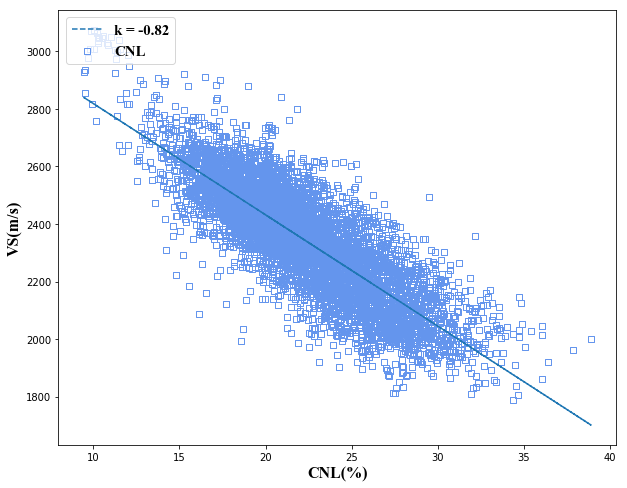

3204.9303027125666


In [11]:
font = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':15,
}


plt.figure(figsize=(10,8))
plt.scatter(dataset['CNL-中子'], dataset['VS-横波速度'],c='none',marker='s',edgecolors='cornflowerblue')
plt.plot(dataset['CNL-中子'], b0 + b1*dataset['CNL-中子'],linestyle='dashed')
plt.legend(['k = -0.82','CNL'],loc=2,prop=font)
plt.xlabel('CNL(%)',fontproperties='Times New Roman',size=16)
plt.ylabel('VS(m/s)',fontproperties='Times New Roman',size=16)
# plt.savefig('CNL与VS相关性.png')
plt.show()

### Visualize the correlation between different well logging features and Vs

In [33]:
r2 = Pearson(dataset['RT-电阻率'],dataset['VS-横波速度'])

In [34]:
b1,b0 = np.polyfit(dataset['RT-电阻率'].ravel(),dataset['VS-横波速度'].ravel(),1)

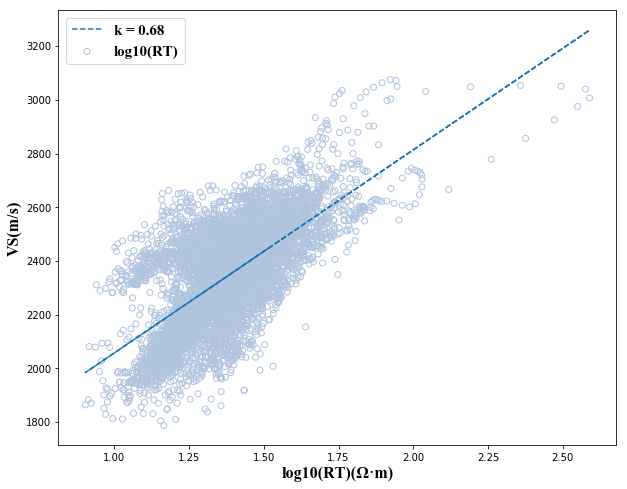

In [35]:
font = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':15,
}


plt.figure(figsize=(10,8))
plt.scatter(dataset['RT-电阻率'], dataset['VS-横波速度'],c='none',marker='o',edgecolors='lightsteelblue')
plt.plot(dataset['RT-电阻率'], b0 + b1*dataset['RT-电阻率'],linestyle='dashed')
plt.legend(['k = 0.68','log10(RT)'],loc=2,prop=font)
plt.xlabel('log10(RT)(Ω·m)',fontproperties='Times New Roman',size=16)
plt.ylabel('VS(m/s)',fontproperties='Times New Roman',size=16)
# plt.savefig('RT与VS相关性.png')
plt.show()

In [36]:
r3 = Pearson(dataset['GR-自然伽马'],dataset['VS-横波速度'])

In [37]:
b1,b0 = np.polyfit(dataset['GR-自然伽马'].ravel(),dataset['VS-横波速度'].ravel(),1)

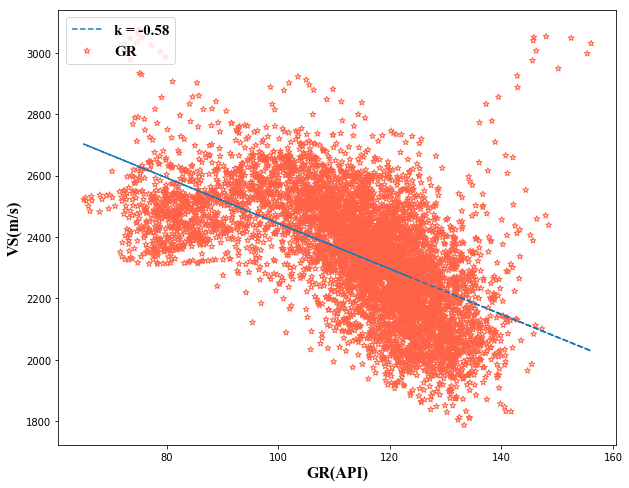

In [40]:
font = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':15,
}


plt.figure(figsize=(10,8))
plt.scatter(dataset['GR-自然伽马'], dataset['VS-横波速度'],c='none',marker='*',edgecolors='tomato')
plt.plot(dataset['GR-自然伽马'], b0 + b1*dataset['GR-自然伽马'],linestyle='dashed')
plt.legend(['k = -0.58','GR'],loc=2,prop=font)
plt.xlabel('GR(API)',fontproperties='Times New Roman',size=16)
plt.ylabel('VS(m/s)',fontproperties='Times New Roman',size=16)
# plt.savefig('GR与VS相关性.png')
plt.show()

In [41]:
r4 = Pearson(dataset['VP-纵波速度'],dataset['VS-横波速度'])

In [42]:
b1,b0 = np.polyfit(dataset['VP-纵波速度'].ravel(),dataset['VS-横波速度'].ravel(),1)

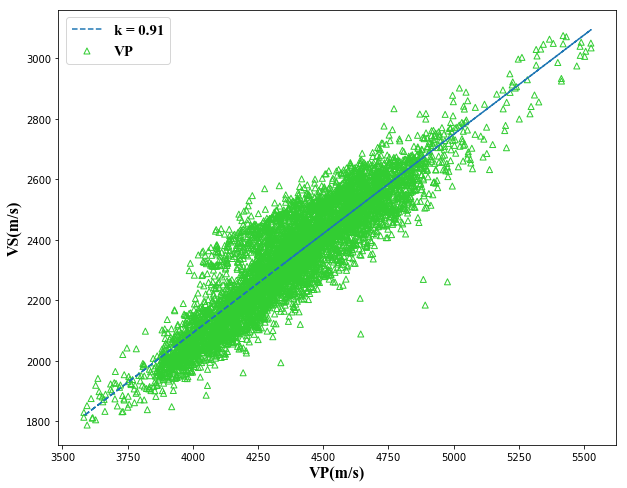

In [47]:
font = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':15,
}


plt.figure(figsize=(10,8))
plt.scatter(dataset['VP-纵波速度'], dataset['VS-横波速度'],c='none',marker='^',edgecolors='limegreen')
plt.plot(dataset['VP-纵波速度'], b0 + b1*dataset['VP-纵波速度'],linestyle='dashed')
plt.legend(['k = 0.91','VP'],loc=2,prop=font)
plt.xlabel('VP(m/s)',fontproperties='Times New Roman',size=16)
plt.ylabel('VS(m/s)',fontproperties='Times New Roman',size=16)
# plt.savefig('GR与VS相关性.png')
plt.show()

In [48]:
r5 = Pearson(dataset['DEN-密度'],dataset['VS-横波速度'])

In [49]:
b1,b0 = np.polyfit(dataset['DEN-密度'].ravel(),dataset['VS-横波速度'].ravel(),1)

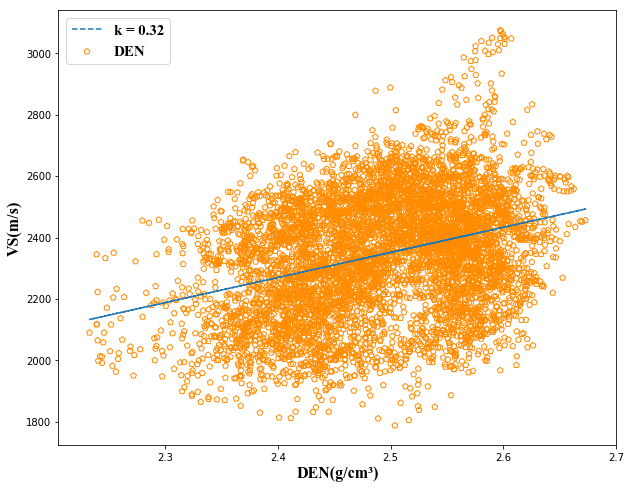

In [53]:
font = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':15,
}


plt.figure(figsize=(10,8))
plt.scatter(dataset['DEN-密度'], dataset['VS-横波速度'],c='none',marker='p',edgecolors='darkorange')
plt.plot(dataset['DEN-密度'], b0 + b1*dataset['DEN-密度'],linestyle='dashed')
plt.legend(['k = 0.32','DEN'],loc=2,prop=font)
plt.xlabel('DEN(g/cm³)',fontproperties='Times New Roman',size=16)
plt.ylabel('VS(m/s)',fontproperties='Times New Roman',size=16)
# plt.savefig('GR与VS相关性.png')
plt.show()